In [1]:
import sys
sys.path.insert(0, '/home/users/brezovec/.local/lib/python3.6/site-packages/lib/python/')
import ants
import os
import bigbadbrain as bbb
import numpy as np
import matplotlib.pyplot as plt
import time
import scipy
import nibabel as nib
import psutil
%matplotlib inline
from skimage.filters import unsharp_mask

In [2]:
import scipy
from skimage.filters import threshold_triangle as triangle
from sklearn.preprocessing import quantile_transform

In [3]:
root_directory = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20190101_walking_dataset/fly_101/anat_0/moco/'

In [4]:
file = os.path.join(root_directory, 'anat_red_clean.nii')
brain = np.asarray(nib.load(file).get_data(), dtype='float32')

In [ ]:
file = "/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/anat_templates/JFRCtemplate2010.nii"
JFRC = np.asarray(nib.load(file).get_data(), dtype='float32')

In [162]:
file = "/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20200807_meanbrain/syn_1_mean.nii"
brain = np.asarray(nib.load(file).get_data(), dtype='float32')

In [21]:
### Load brain ###
file = "/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20200807_meanbrain/syn_1_mean.nii"
brain = np.asarray(nib.load(file).get_data(), dtype='float32')

In [22]:
brain.shape

(1024, 512, 256)

In [6]:
brain[np.where(brain == 0)] = np.nan

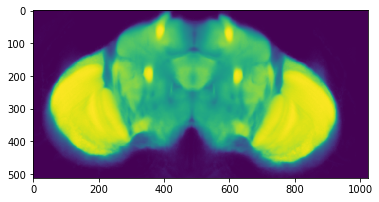

In [34]:
plt.imshow(brain[...,100].T)

In [24]:
plt.hist(brain.flatten(),bins=100);

In [25]:
a = .3
b = .7
brain_input = a + (brain)*(b-a)

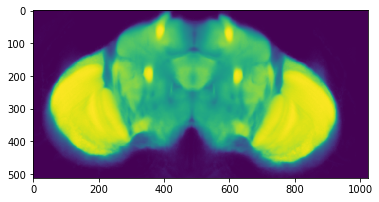

In [26]:
plt.imshow(brain_input[...,100].T)

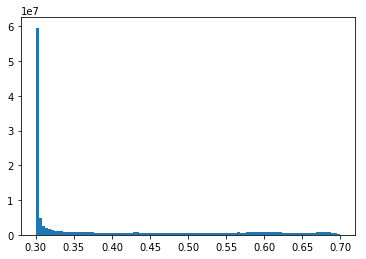

In [27]:
plt.hist(brain_input.flatten(),bins=100);

In [28]:
brain_sharp = unsharp_mask(brain_input, radius=3, amount=7)

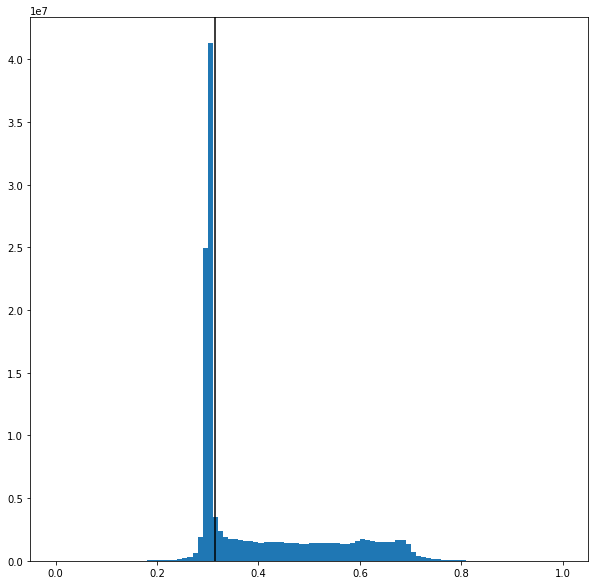

In [33]:
plt.figure(figsize=(10,10))
plt.hist(brain_sharp.flatten(),bins=100);
plt.axvline(triangle(brain_sharp),color='k')

In [35]:
brain_copy = brain.copy()

In [59]:
brain_copy = brain.copy()
brain_copy[np.where(brain_sharp < .31)] = np.nan

In [60]:
plt.imshow(brain_copy[...,100].T)

In [76]:
### Load brain ###
file = os.path.join(root_directory, 'anat_red_clean.nii') 
brain = np.asarray(nib.load(file).get_data(), dtype='float32')

# renormalize to .3-.7
a = .3
b = .7
brain_input = a + (brain)*(b-a)

# sharpen
brain_sharp = unsharp_mask(brain_input, radius=3, amount=7)

# make background nan
brain_copy = brain_sharp.copy()
brain_copy[np.where(brain_input < .31)] = np.nan

# renormalize via quantile
brain_out = quantile_transform(brain_copy.flatten().reshape(-1, 1), n_quantiles=500, random_state=0, copy=True)
brain_out = brain_out.reshape(brain.shape);
np.nan_to_num(brain_out, copy=False);

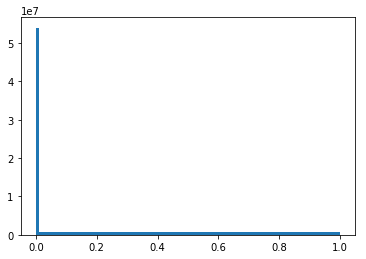

In [78]:
plt.hist(brain_out.flatten(),bins=100);

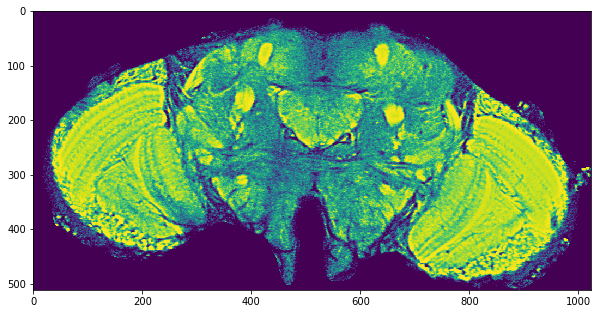

In [77]:
plt.figure(figsize=(10,10))
#plt.imshow(brain_sharp[...,100].T)
plt.imshow(brain_out[...,100].T)

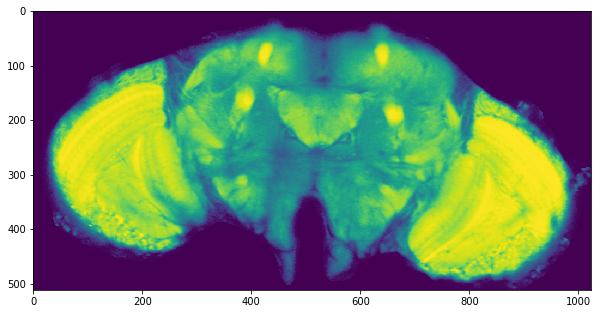

In [75]:
plt.figure(figsize=(10,10))
plt.imshow(brain[...,100].T)

In [16]:
### Perform quantile normalization ###
brain_out = quantile_transform(brain_sharp.flatten().reshape(-1, 1), n_quantiles=500, random_state=0, copy=True)
brain_out = brain_out.reshape(brain.shape)
np.nan_to_num(brain_out, copy=False)

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

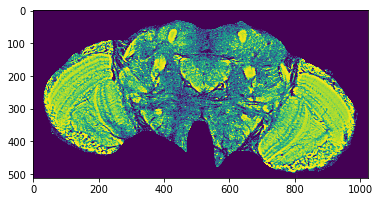

In [17]:
plt.imshow(brain_out[...,100].T)

In [18]:
plt.hist(brain_out.flatten(),bins=100);

In [206]:
root_directory = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/anat_templates'
save_file = os.path.join(root_directory, 'test_001.nii')
aff = np.eye(4)
img = nib.Nifti1Image(brain_out, aff)
img.to_filename(save_file)

In [163]:
a = .2
b = .8
brain_input = a + (brain - np.min(brain))*(b-a)/(np.max(brain)-np.min(brain))

In [164]:
plt.hist(brain_input.flatten(),bins=100);

In [138]:
brain_sharp = unsharp_mask(brain_input, radius=10, amount=.5)
brain_sharp = unsharp_mask(brain_sharp, radius=5, amount=.5)
brain_sharp = unsharp_mask(brain_sharp, radius=2, amount=.5)

In [165]:
brain_sharp = unsharp_mask(brain_input, radius=3, amount=10)

In [124]:
brain_norm = (brain_sharp - np.min(brain_sharp)) / (np.max(brain_sharp) - np.min(brain_sharp))

In [167]:
brain_norm = (brain_sharp - .2) / (.8)

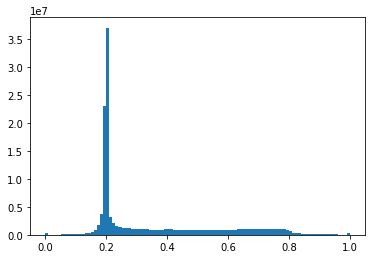

In [169]:
plt.hist(brain_sharp.flatten(),bins=100);

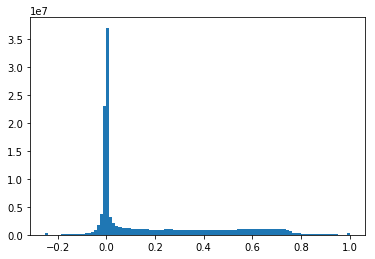

In [168]:
plt.hist(brain_norm.flatten(),bins=100);
#plt.xlim(.8,1)
#plt.ylim(0,.1e7)

In [159]:
root_directory = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/anat_templates'
save_file = os.path.join(root_directory, 'test_001.nii')
aff = np.eye(4)
img = nib.Nifti1Image(brain_norm, aff)
img.to_filename(save_file)

In [7]:
JFRC_sharp = unsharp_mask(JFRC, radius=5, amount=1000)

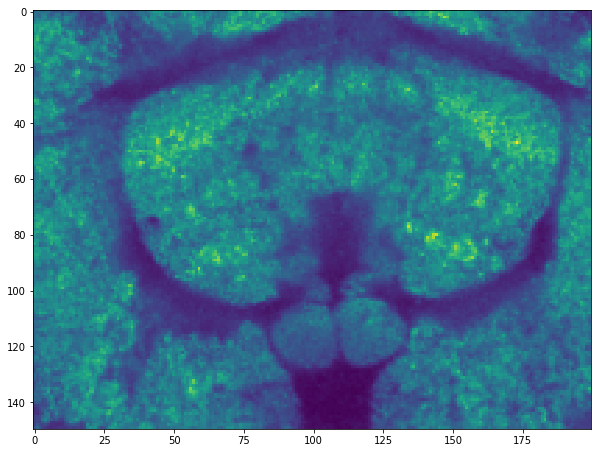

In [29]:
plt.figure(figsize=(10,10))
plt.imshow(JFRC[400:600,100:250,110,0].T)

In [147]:
plt.figure(figsize=(10,10))
plt.imshow(meanbrain[...,110].T)

In [157]:
plt.figure(figsize=(10,10))
plt.imshow(brain_sharp[...,110].T)

In [170]:
plt.figure(figsize=(10,10))
plt.imshow(brain_norm[...,110].T)

In [140]:
plt.figure(figsize=(10,10))
plt.imshow(brain_sharp[...,110].T,vmin=.9,vmax=1)

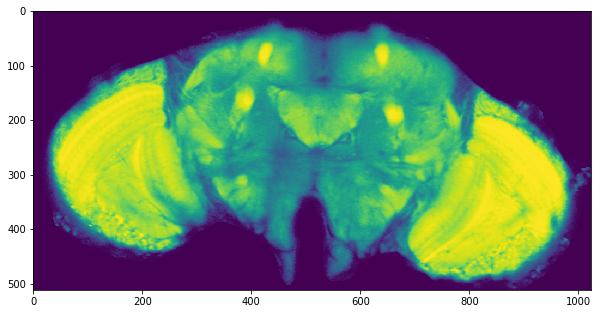

In [54]:
plt.figure(figsize=(10,10))
plt.imshow(brain[...,100].T)

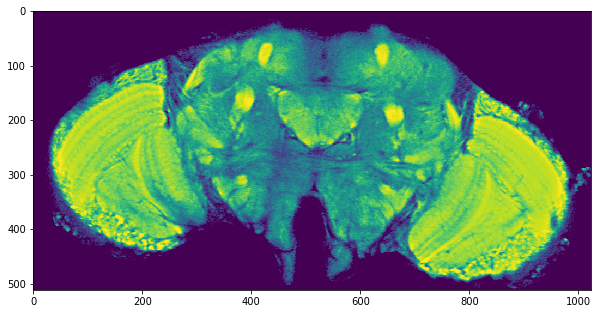

In [98]:
plt.figure(figsize=(10,10))
plt.imshow(brain_sharp[...,100].T)

In [47]:
plt.figure(figsize=(10,10))
plt.imshow(brain_sharp[400:650,100:300,100].T)

In [23]:
plt.figure(figsize=(10,10))
plt.imshow(brain_sharp[400:700,100:300,100].T) #3,5

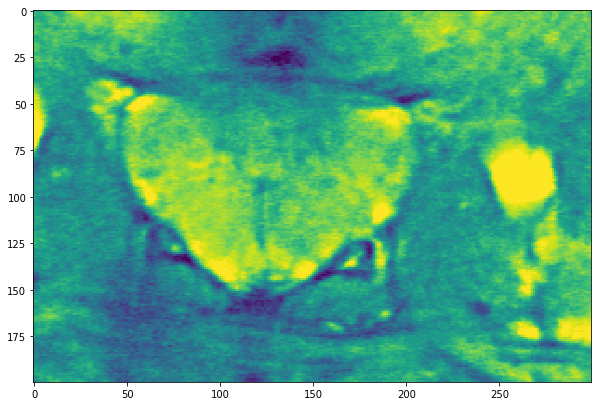

In [19]:
plt.figure(figsize=(10,10))
plt.imshow(brain_sharp[400:700,100:300,100].T) #5,2

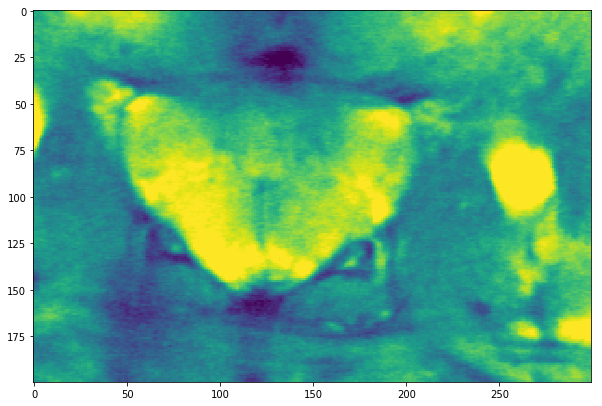

In [16]:
plt.figure(figsize=(10,10))
plt.imshow(brain_sharp[400:700,100:300,100].T) #20,1

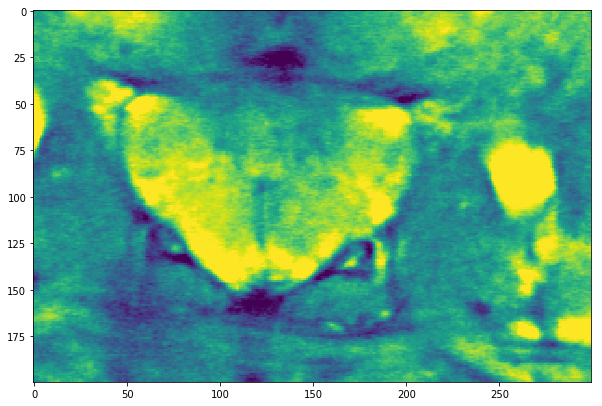

In [13]:
plt.figure(figsize=(10,10))
plt.imshow(brain_sharp[400:700,100:300,100].T) #10,2

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(brain_sharp[400:700,100:300,100].T)

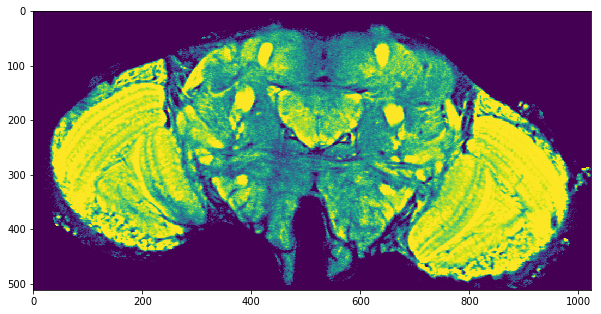

In [22]:
plt.figure(figsize=(10,10))
plt.imshow(brain_sharp[...,100].T) #5,4

In [52]:
plt.figure(figsize=(10,10))
plt.imshow(JFRC_sharp[:,:,150,0].T)

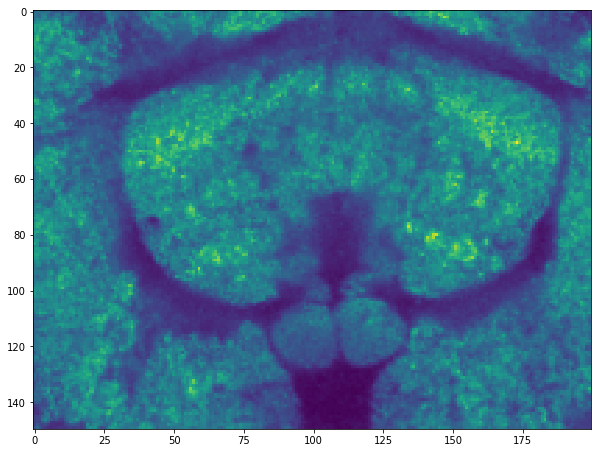

In [28]:
plt.figure(figsize=(10,10))
plt.imshow(JFRC[400:600,100:250,110,0].T)

In [14]:
plt.figure(figsize=(10,10))
plt.imshow(brain_sharp[...,100].T) #2,10

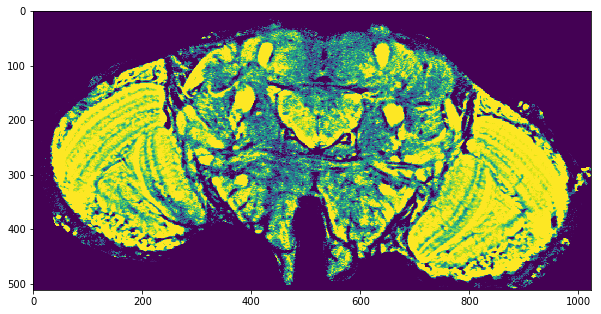

In [12]:
plt.figure(figsize=(10,10))
plt.imshow(brain_sharp[...,100].T) #5,10

In [9]:
plt.figure(figsize=(10,10))
plt.imshow(JFRC_sharp[:,:,110,0].T) #5,1000

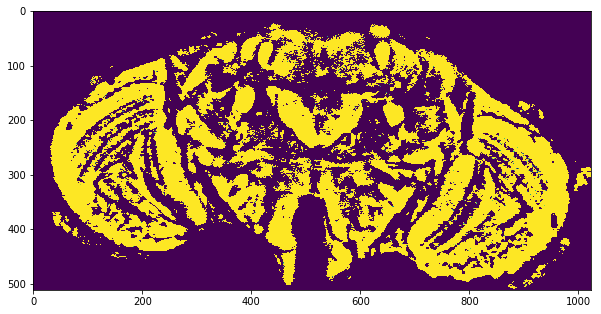

In [32]:
plt.figure(figsize=(10,10))
plt.imshow(brain_sharp[...,100].T) #10 radius

In [30]:
plt.figure(figsize=(10,10))
plt.imshow(brain_sharp[...,100].T) # 2 radius

In [20]:
plt.figure(figsize=(10,10))
plt.imshow(brain_sharp[...,100].T)

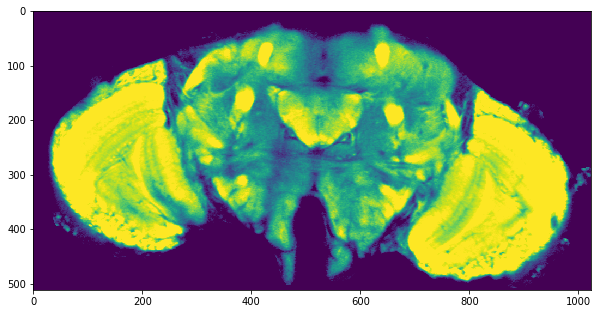

In [17]:
plt.figure(figsize=(10,10))
plt.imshow(brain_sharp[...,100].T)

In [14]:
plt.figure(figsize=(10,10))
plt.imshow(brain_sharp[...,100].T)

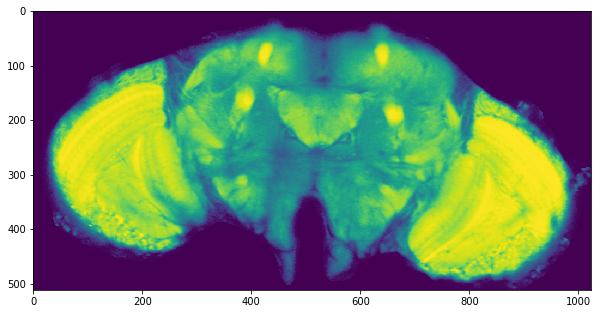

In [11]:
plt.figure(figsize=(10,10))
plt.imshow(brain[...,100].T)